In [1]:
# Importing libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder


In [2]:
# load the training and testing data
train = pd.read_csv("fraudTrain.csv")
test = pd.read_csv("fraudTest.csv")


In [3]:
train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

### *Dropping irrelevant columns*

In [7]:
#merchant,'job'
train = train[['cc_num','category','amt','gender','city_pop','unix_time', 'merch_lat', 'merch_long', 'is_fraud']]
test = test[['cc_num','category','amt','gender','city_pop','unix_time', 'merch_lat', 'merch_long', 'is_fraud']]

In [8]:
test

,cc_num,category,amt,gender,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2291163933867244,personal_care,2.86,M,333497,1371816865,33.986391,-81.200714,0
1,3573030041201292,personal_care,29.84,F,302,1371816873,39.450498,-109.960431,0
2,3598215285024754,health_fitness,41.28,F,34496,1371816893,40.495810,-74.196111,0
3,3591919803438423,misc_pos,60.05,M,54767,1371816915,28.812398,-80.883061,0
4,3526826139003047,travel,3.19,M,1126,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...
555714,30560609640617,health_fitness,43.77,M,519,1388534347,39.946837,-91.333331,0
555715,3556613125071656,kids_pets,111.84,M,28739,1388534349,29.661049,-96.186633,0
555716,6011724471098086,kids_pets,86.88,F,3684,1388534355,46.658340,-119.715054,0
555717,4079773899158,travel,7.99,M,129,1388534364,44.470525,-117.080888,0


### *Checking null values*

In [9]:
train.isnull().sum()

cc_num        0
category      0
amt           0
gender        0
city_pop      0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

### *Checking unique value counts*

In [12]:
train["category"].value_counts()

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

In [13]:
# le = LabelEncoder()

In [14]:
train

,cc_num,category,amt,gender,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,misc_net,4.97,F,3495,1325376018,36.011293,-82.048315,0
1,630423337322,grocery_pos,107.23,F,149,1325376044,49.159047,-118.186462,0
2,38859492057661,entertainment,220.11,M,4154,1325376051,43.150704,-112.154481,0
3,3534093764340240,gas_transport,45.00,M,1939,1325376076,47.034331,-112.561071,0
4,375534208663984,misc_pos,41.96,M,99,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,entertainment,15.56,M,258,1371816728,36.841266,-111.690765,0
1296671,6011149206456997,food_dining,51.70,M,100,1371816739,38.906881,-78.246528,0
1296672,3514865930894695,food_dining,105.93,M,899,1371816752,33.619513,-105.130529,0
1296673,2720012583106919,food_dining,74.90,M,1126,1371816816,42.788940,-103.241160,0


In [15]:
test

,cc_num,category,amt,gender,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2291163933867244,personal_care,2.86,M,333497,1371816865,33.986391,-81.200714,0
1,3573030041201292,personal_care,29.84,F,302,1371816873,39.450498,-109.960431,0
2,3598215285024754,health_fitness,41.28,F,34496,1371816893,40.495810,-74.196111,0
3,3591919803438423,misc_pos,60.05,M,54767,1371816915,28.812398,-80.883061,0
4,3526826139003047,travel,3.19,M,1126,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...
555714,30560609640617,health_fitness,43.77,M,519,1388534347,39.946837,-91.333331,0
555715,3556613125071656,kids_pets,111.84,M,28739,1388534349,29.661049,-96.186633,0
555716,6011724471098086,kids_pets,86.88,F,3684,1388534355,46.658340,-119.715054,0
555717,4079773899158,travel,7.99,M,129,1388534364,44.470525,-117.080888,0


### *Encoding object type features*

In [16]:

train = pd.get_dummies(train, columns=['gender'])
train = pd.get_dummies(train, columns=['category'])

test = pd.get_dummies(test, columns=['gender'])
test = pd.get_dummies(test, columns=['category'])

In [17]:
train

,cc_num,amt,city_pop,unix_time,merch_lat,merch_long,is_fraud,gender_F,gender_M,category_entertainment,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2703186189652095,4.97,3495,1325376018,36.011293,-82.048315,0,True,False,False,...,False,False,False,False,True,False,False,False,False,False
1,630423337322,107.23,149,1325376044,49.159047,-118.186462,0,True,False,False,...,True,False,False,False,False,False,False,False,False,False
2,38859492057661,220.11,4154,1325376051,43.150704,-112.154481,0,False,True,True,...,False,False,False,False,False,False,False,False,False,False
3,3534093764340240,45.00,1939,1325376076,47.034331,-112.561071,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,375534208663984,41.96,99,1325376186,38.674999,-78.632459,0,False,True,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,15.56,258,1371816728,36.841266,-111.690765,0,False,True,True,...,False,False,False,False,False,False,False,False,False,False
1296671,6011149206456997,51.70,100,1371816739,38.906881,-78.246528,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1296672,3514865930894695,105.93,899,1371816752,33.619513,-105.130529,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1296673,2720012583106919,74.90,1126,1371816816,42.788940,-103.241160,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
test

,cc_num,amt,city_pop,unix_time,merch_lat,merch_long,is_fraud,gender_F,gender_M,category_entertainment,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2291163933867244,2.86,333497,1371816865,33.986391,-81.200714,0,False,True,False,...,False,False,False,False,False,False,True,False,False,False
1,3573030041201292,29.84,302,1371816873,39.450498,-109.960431,0,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,3598215285024754,41.28,34496,1371816893,40.495810,-74.196111,0,True,False,False,...,False,True,False,False,False,False,False,False,False,False
3,3591919803438423,60.05,54767,1371816915,28.812398,-80.883061,0,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,3526826139003047,3.19,1126,1371816917,44.959148,-85.884734,0,False,True,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,43.77,519,1388534347,39.946837,-91.333331,0,False,True,False,...,False,True,False,False,False,False,False,False,False,False
555715,3556613125071656,111.84,28739,1388534349,29.661049,-96.186633,0,False,True,False,...,False,False,False,True,False,False,False,False,False,False
555716,6011724471098086,86.88,3684,1388534355,46.658340,-119.715054,0,True,False,False,...,False,False,False,True,False,False,False,False,False,False
555717,4079773899158,7.99,129,1388534364,44.470525,-117.080888,0,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [19]:
# test['gender'] = test['gender'].map({'F': 0, 'M': 1})
# test['job'] = le.fit_transform(test['job'])
# test['category'] = le.fit_transform(test['category'])
# test['merchant'] = le.fit_transform(test['merchant'])

In [20]:
train

,cc_num,amt,city_pop,unix_time,merch_lat,merch_long,is_fraud,gender_F,gender_M,category_entertainment,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2703186189652095,4.97,3495,1325376018,36.011293,-82.048315,0,True,False,False,...,False,False,False,False,True,False,False,False,False,False
1,630423337322,107.23,149,1325376044,49.159047,-118.186462,0,True,False,False,...,True,False,False,False,False,False,False,False,False,False
2,38859492057661,220.11,4154,1325376051,43.150704,-112.154481,0,False,True,True,...,False,False,False,False,False,False,False,False,False,False
3,3534093764340240,45.00,1939,1325376076,47.034331,-112.561071,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,375534208663984,41.96,99,1325376186,38.674999,-78.632459,0,False,True,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,15.56,258,1371816728,36.841266,-111.690765,0,False,True,True,...,False,False,False,False,False,False,False,False,False,False
1296671,6011149206456997,51.70,100,1371816739,38.906881,-78.246528,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1296672,3514865930894695,105.93,899,1371816752,33.619513,-105.130529,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1296673,2720012583106919,74.90,1126,1371816816,42.788940,-103.241160,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False


### *Checking for imbalanced data*

In [21]:
train["is_fraud"].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

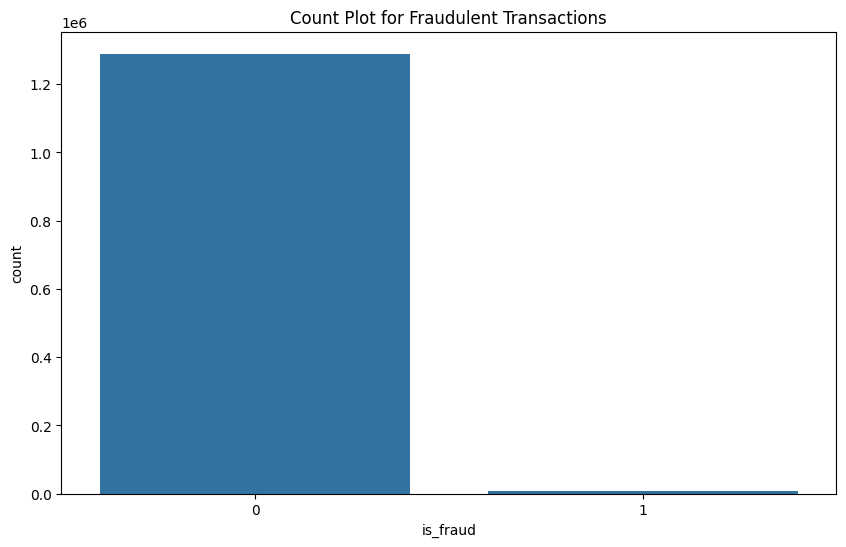

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x='is_fraud', data=train)
plt.title('Count Plot for Fraudulent Transactions')
plt.show()

In [23]:
x = train.drop(columns='is_fraud')
y = train["is_fraud"]

x_test = test.drop(columns='is_fraud')
y_test = test["is_fraud"]


In [24]:
x

,cc_num,amt,city_pop,unix_time,merch_lat,merch_long,gender_F,gender_M,category_entertainment,category_food_dining,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2703186189652095,4.97,3495,1325376018,36.011293,-82.048315,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,630423337322,107.23,149,1325376044,49.159047,-118.186462,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,38859492057661,220.11,4154,1325376051,43.150704,-112.154481,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,3534093764340240,45.00,1939,1325376076,47.034331,-112.561071,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,375534208663984,41.96,99,1325376186,38.674999,-78.632459,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,15.56,258,1371816728,36.841266,-111.690765,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1296671,6011149206456997,51.70,100,1371816739,38.906881,-78.246528,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1296672,3514865930894695,105.93,899,1371816752,33.619513,-105.130529,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1296673,2720012583106919,74.90,1126,1371816816,42.788940,-103.241160,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False


# ***SMOTE***

*Using SMOTE to increase rows in minority data*

In [25]:
smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x, y)

In [26]:
y_res.value_counts()

is_fraud
0    1289169
1    1289169
Name: count, dtype: int64

*Now, the data is balanced*

# ***Model Training***

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
x_res

### ***Logistic Regression***

In [28]:
lr = LogisticRegression(max_iter=200)
lr.fit(x_res,y_res)

lr_predictions_train = lr.predict(x_res)
lr_pred = lr.predict(x_test)


accuracy = accuracy_score(y_res, lr_predictions_train)
print(f'LR Accuracy: {accuracy}')
accuracy = accuracy_score(y_test, lr_pred)
print(f'LR Accuracy: {accuracy}')
print(classification_report(y_test, lr_pred, zero_division=1))

LR Accuracy: 0.5
LR Accuracy: 0.9961401355721147
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       1.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       1.00      0.50      0.50    555719
weighted avg       1.00      1.00      0.99    555719



### ***Decision Tree***


In [29]:
dt = DecisionTreeClassifier()
dt.fit(x_res,y_res)

dt_predictions_train = dt.predict(x_res)
dt_pred = dt.predict(x_test)


accuracy = accuracy_score(y_res, dt_predictions_train)
print(f'dt Accuracy: {accuracy}')
accuracy = accuracy_score(y_test, dt_pred)
print(f'dt Accuracy: {accuracy}')
print(classification_report(y_test, dt_pred, zero_division=1))

dt Accuracy: 1.0
dt Accuracy: 0.993278977324871
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.27      0.45      0.34      2145

    accuracy                           0.99    555719
   macro avg       0.64      0.72      0.67    555719
weighted avg       1.00      0.99      0.99    555719



### ***Random Forest***


In [30]:
rf = RandomForestClassifier()
rf.fit(x_res,y_res)

rf_predictions_train = rf.predict(x_res)
rf_pred = rf.predict(x_test)


accuracy = accuracy_score(y_res, rf_predictions_train)
print(f'rf Accuracy: {accuracy}')
accuracy = accuracy_score(y_test, rf_pred)
print(f'rf Accuracy: {accuracy}')
print(classification_report(y_test, rf_pred, zero_division=1))

### ***Naive Bayes***

In [ ]:
nb = MultinomialNB()
nb.fit(x_res,y_res)

nb_predictions_train = nb.predict(x_res)
nb_pred = nb.predict(x_test)


accuracy = accuracy_score(y_res, nb_predictions_train)
print(f'nb Accuracy: {accuracy}')
accuracy = accuracy_score(y_test, nb_pred)
print(f'nb Accuracy: {accuracy}')
print(classification_report(y_test, nb_pred, zero_division=1))

### ***Support Vector***

In [ ]:
svc = SVC()
svc.fit(x_res,y_res)

svc_predictions_train = svc.predict(x_res)
svc_pred = svc.predict(x_test)


accuracy = accuracy_score(y_res, svc_predictions_train)
print(f'svc Accuracy: {accuracy}')
accuracy = accuracy_score(y_test, svc_pred)
print(f'svc Accuracy: {accuracy}')
print(classification_report(y_test, svc_pred, zero_division=1))

### *Summary of the Models Trained*

In [ ]:
summary = pd.DataFrame({'Models':['LR','NB','RF','DT','SVC'],
                        'Accuracy':[accuracy_score(y_test,lr_pred),
                                    accuracy_score(y_test,nb_pred),
                                    accuracy_score(y_test,rf_pred),
                                    accuracy_score(y_test,dt_pred),
                                    accuracy_score(y_test,svc_pred)]})

In [ ]:
summary

*After training the best model is   with % Accuracy.*